# Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
f = 'XTern 2024 Artificial Intelegence Data Set.xlsx'
df = pd.read_excel(f)

df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


### Below are the columns within the dataset:

Year: The year of study of the students

Major: The major of study of the students

University: The university that the students are attending

Time: Time of order

Order: The item orderd

In [2]:
# check for missing values in the dataset
missing = df.isnull().sum()
missing

Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64

No missing values in the dataset

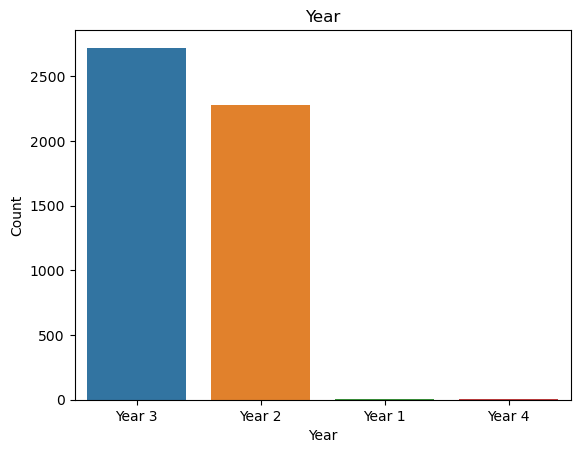

In [27]:
# find the distribution of year
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

There are mostly year 2 and 3 students in the dataset, with year 3 students being the majority, followed by year 2 students.

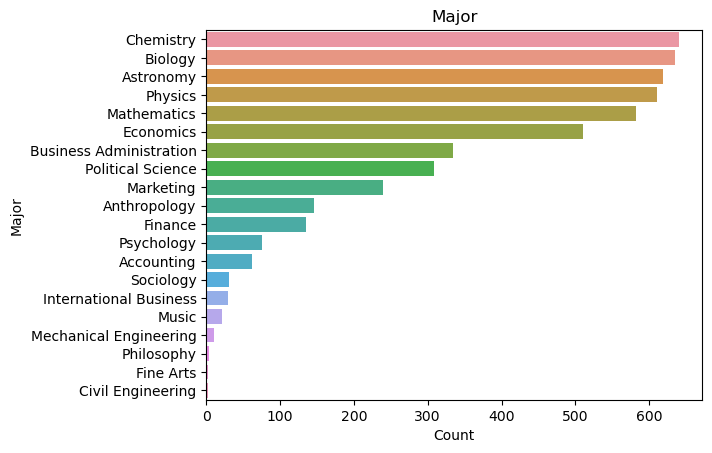

In [28]:
# find the distribution of major
sns.countplot(y='Major', data=df, order=df['Major'].value_counts().index)
plt.title('Major')
plt.xlabel('Count')
plt.ylabel('Major')
plt.show()

There are diverse majors within the dataset. Chemistry, Biology, Astronomy, Physics, Mathematics, and Economics are the most common majors, and we can see a significant drop in number of students after these six majors.

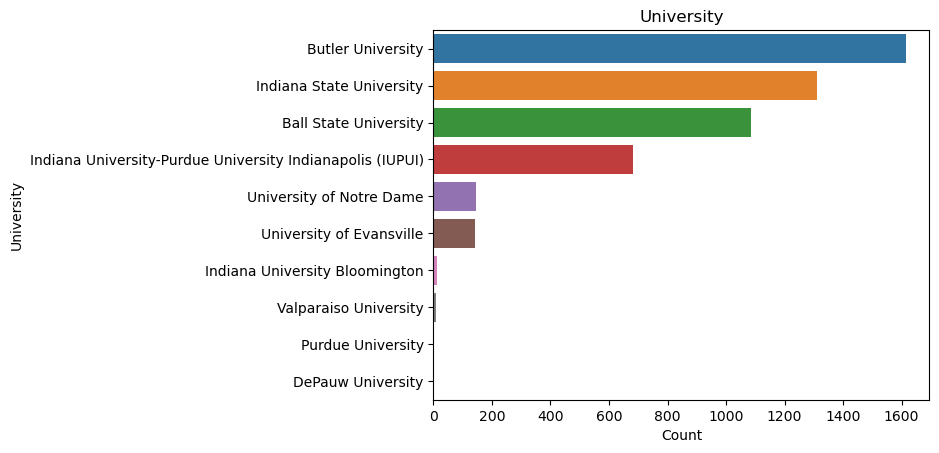

In [29]:
# find the distribution by university
sns.countplot(y='University', data=df, order=df['University'].value_counts().index)
plt.title('University')
plt.xlabel('Count')
plt.ylabel('University')
plt.show()

There are students from different universities with Butler University being the most common university among them followed by Indiana State University and Ball State University.

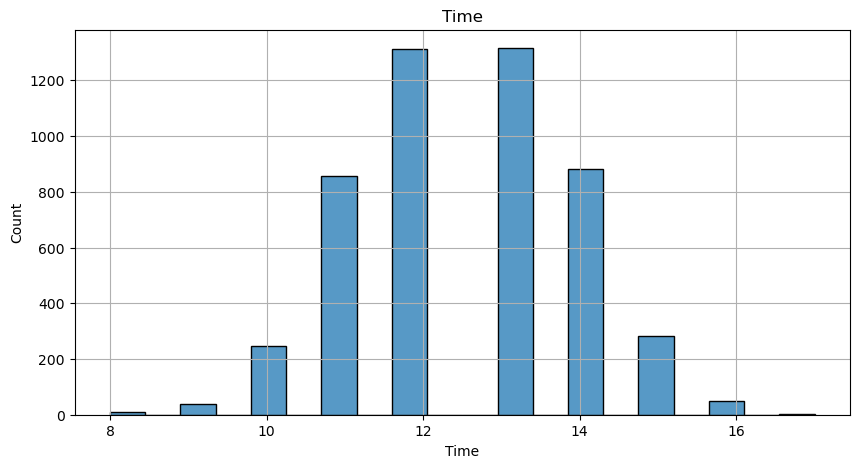

In [34]:
# study the Time column
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=20)
plt.title('Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Time of order is concentrated around 12 and 13. We can see that majority of the people prefer to place order during lunch.

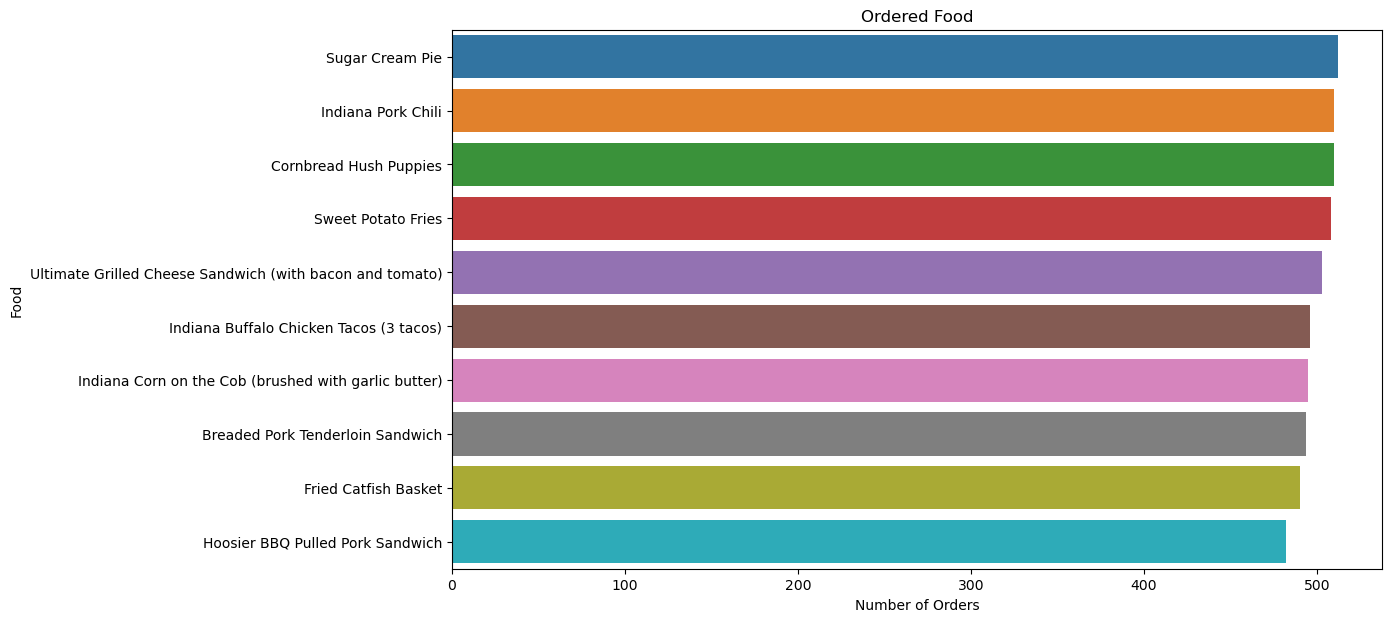

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(y='Order', data=df, order=df['Order'].value_counts().index)
plt.title('Ordered Food')
plt.xlabel('Number of Orders')
plt.ylabel('Food')
plt.show()

All items ordered are quite evenly ordered with not a single item being dramatically more than others. Sugar Cream Pie, Indiana Pork Chili, and Cornbread Hush Puppies are the most ordered food items.

# Business use cases

1. We can find the food preference of students in each year and create targetted marketing for the students based on insights gained

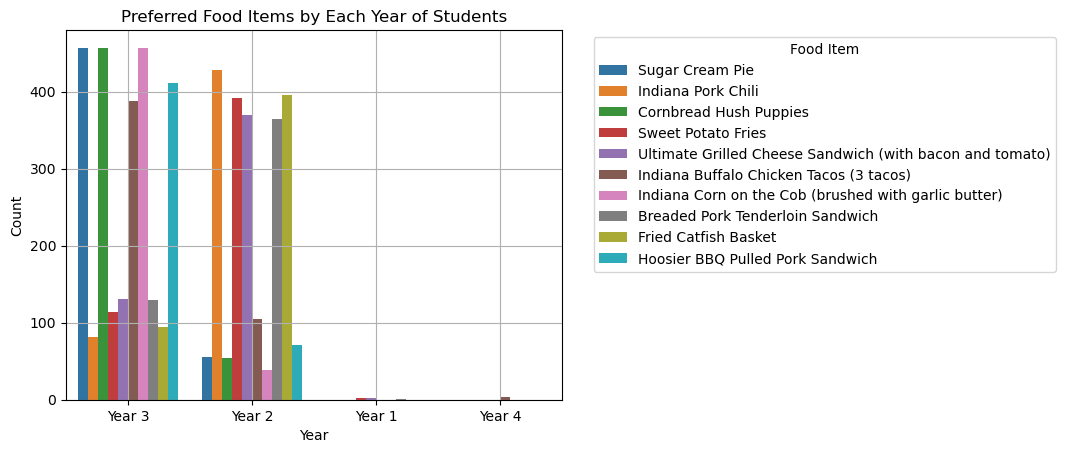

In [37]:
sns.countplot(x='Year', hue='Order', data=df, 
              order=df['Year'].value_counts().index, 
              hue_order=df['Order'].value_counts().index)

plt.title('Preferred Food Items by Each Year of Students')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left', labels=df['Order'].value_counts().index)
plt.grid(True)
plt.show()

It is clear that we must focus the marketing efforts toward year 2 and 3 students as they are the key customers that order the most. Year 3 students prefer Sugar Cream Pie, Cornbread Hush Puppies, Indiana Buffalo Chicken Tacos, Indiana Corn on the Cob and Hoosier BBQ Pulled Pork Sandwich. Year 2 students prefer Indiana Pork Chili, Sweet Potato Fries, Ultimate Grilled Cheese Sandwich, Breaded Pork Tenderloin Sandiwich and Fried Catfish Basket. We can add promotions on these products to generate more revenue.

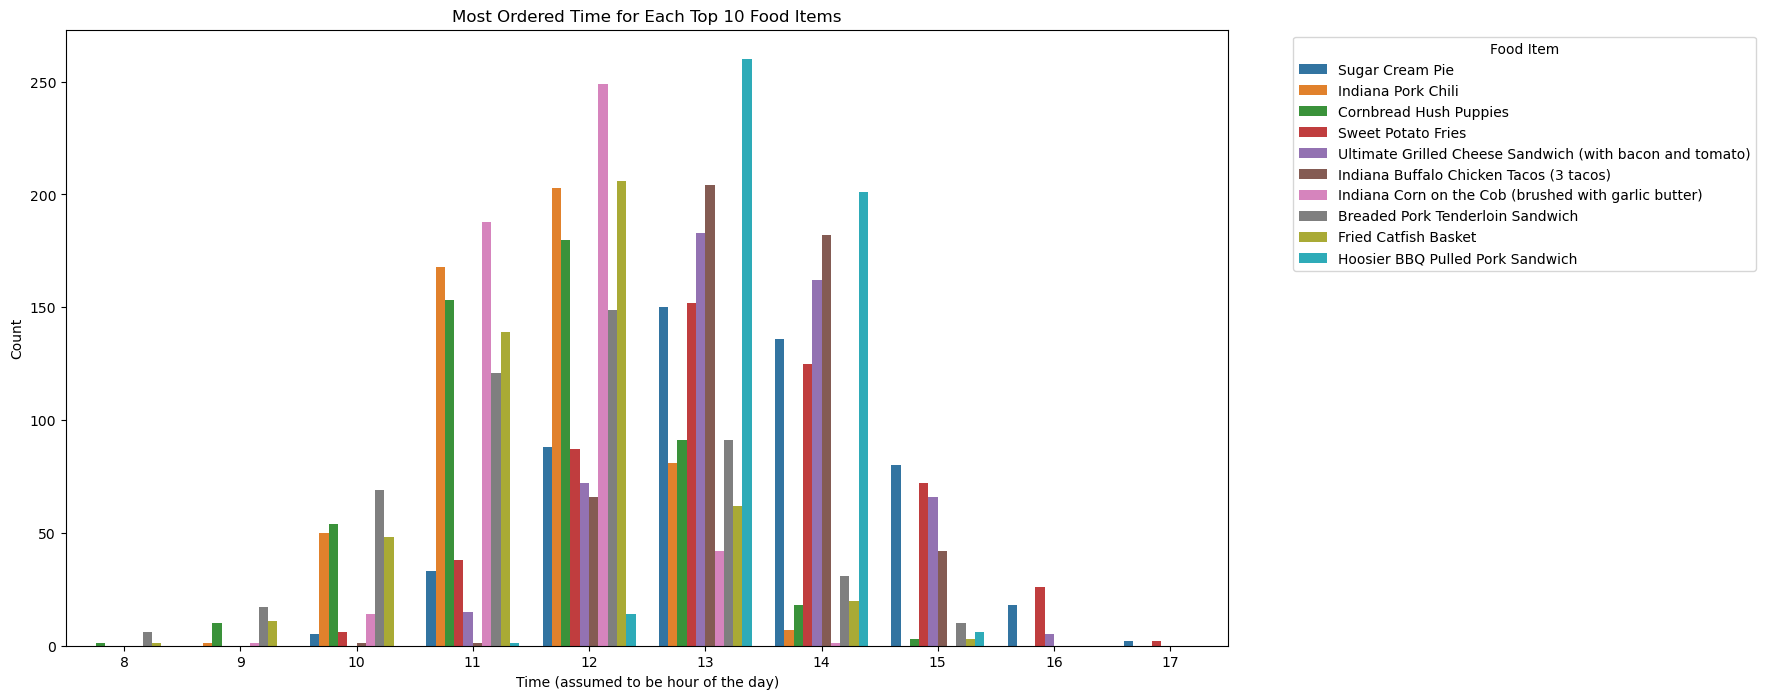

In [44]:
# Filtering the top 10 most common food items for visualization
top_10_foods = df['Order'].value_counts().nlargest(10).index
filtered_df = df[df['Order'].isin(top_10_foods)]

# Creating a bar plot to visualize the most ordered time for each food item
plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_df, x='Time', hue='Order', hue_order=top_10_foods)

# Customizing the plot for better readability
plt.title('Most Ordered Time for Each Top 10 Food Items')
plt.xlabel('Time (assumed to be hour of the day)')
plt.ylabel('Count')
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

In [40]:
# Grouping by 'Time' and getting the top 3 most commonly ordered items at each time
top_3_orders_per_time = df.groupby('Time')['Order'].apply(lambda x: x.value_counts().nlargest(3).index.tolist()).reset_index()

# Displaying the top 3 most commonly ordered items at each time
print(top_3_orders_per_time.to_string(index=False))

 Time                                                                                                                                 Order
    8                                                      [Breaded Pork Tenderloin Sandwich, Cornbread Hush Puppies, Fried Catfish Basket]
    9                                                      [Breaded Pork Tenderloin Sandwich, Fried Catfish Basket, Cornbread Hush Puppies]
   10                                                        [Breaded Pork Tenderloin Sandwich, Cornbread Hush Puppies, Indiana Pork Chili]
   11                                    [Indiana Corn on the Cob (brushed with garlic butter), Indiana Pork Chili, Cornbread Hush Puppies]
   12                                      [Indiana Corn on the Cob (brushed with garlic butter), Fried Catfish Basket, Indiana Pork Chili]
   13 [Hoosier BBQ Pulled Pork Sandwich, Indiana Buffalo Chicken Tacos (3 tacos), Ultimate Grilled Cheese Sandwich (with bacon and tomato)]
   14 [Hoosier BBQ P

We found out which are the top 3 most commonly ordered items at each time. Using this piece of information, we can optimize inventory so that order can be made promptly without shortages

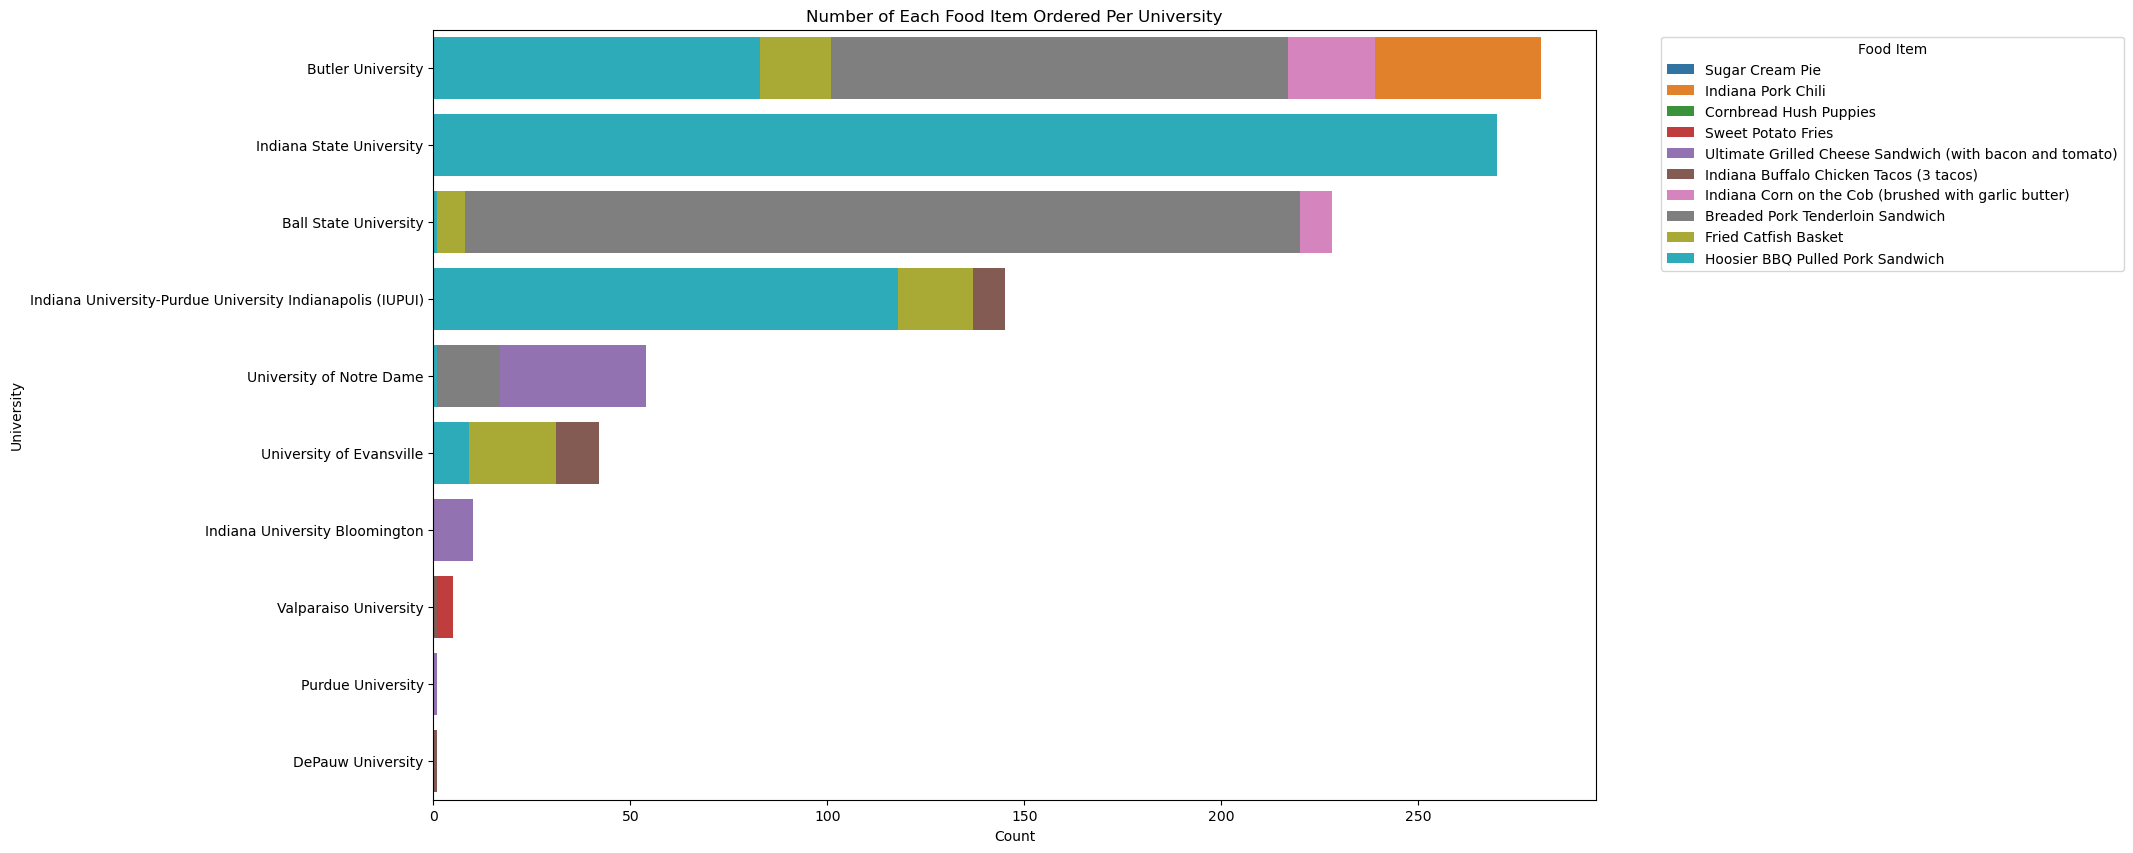

In [41]:
# Creating a bar plot to visualize the number of each food item ordered per university
plt.figure(figsize=(15, 10))

# Using a countplot to display the number of each food ordered per university
sns.countplot(y='University', hue='Order', data=df, 
              order=df['University'].value_counts().index, 
              hue_order=df['Order'].value_counts().index, 
              dodge=False)

# Customizing the plot for better readability
plt.title('Number of Each Food Item Ordered Per University')
plt.xlabel('Count')
plt.ylabel('University')
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

We can see the food preferencese of students in different universities. We can focus marketing efforts for the most popular items to maximize profit, or prepare certain items more than others when visiting certain schools. This piece of information could be most useful in business cases because majors and year of study are not readily visible when they visit the food truck, unlike the location of the school.

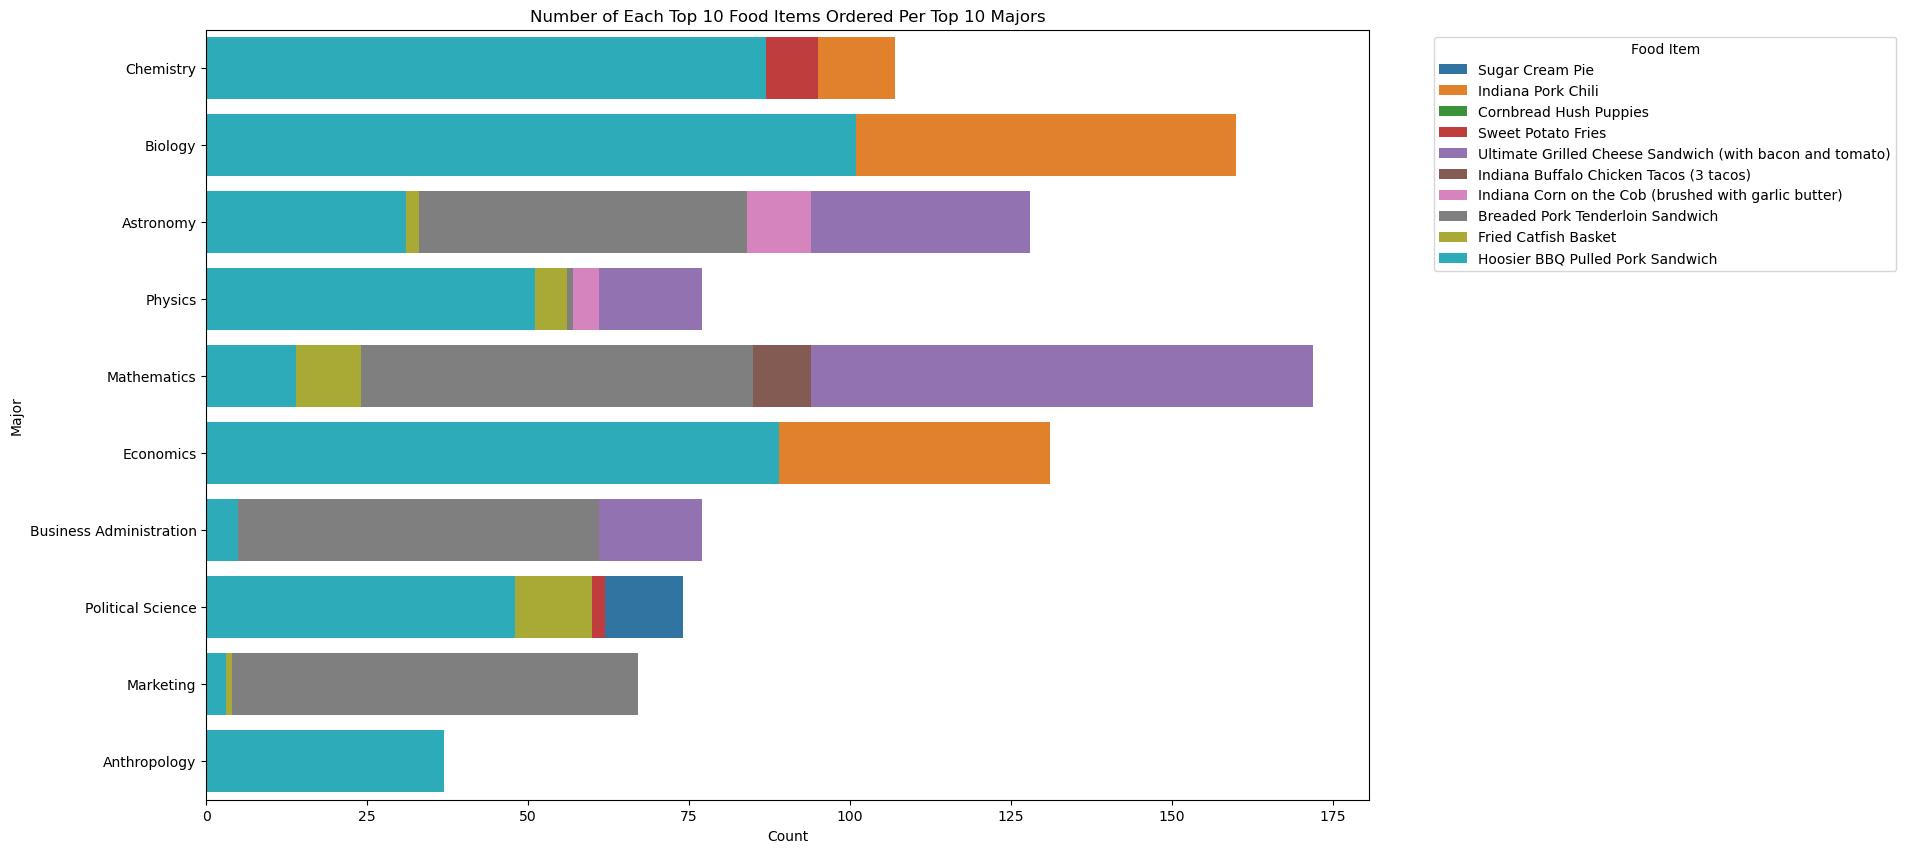

In [43]:
# Filtering the top 10 most common majors and food items for visualization
top_10_majors = df['Major'].value_counts().nlargest(10).index
top_10_foods = df['Order'].value_counts().nlargest(10).index
filtered_df = df[df['Major'].isin(top_10_majors) & df['Order'].isin(top_10_foods)]

# Creating a bar plot to visualize the number of each food item ordered per major
plt.figure(figsize=(15, 10))
sns.countplot(y='Major', hue='Order', data=filtered_df, 
              order=top_10_majors, 
              hue_order=top_10_foods, 
              dodge=False)

# Customizing the plot for better readability
plt.title('Number of Each Top 10 Food Items Ordered Per Top 10 Majors')
plt.xlabel('Count')
plt.ylabel('Major')
plt.legend(title='Food Item', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

We can see the food preferences of students in different majors, which can also be useful in marketing and sales efforts.

# Data Ethics

Collecting data on individual student's food choices, universities, and majors could lead to privacy concerns. Therefore, it is imporant to anonymize data and ensure that the data was collected with the consent of the individuals. The dataset could also be biased, represending only a subset of the student population or cetain food preferences limited to the school and the menu given.

# Business Outcome Implications

Potential business outcomes would be personalized marketing, effective inventory management, and menu optimization. All these could lead to increased sales due to effective marketing and decreased cost due to minimized waste in inventory, thereby leading to maximized profit.

# Technical Implications

Storing data requires security infrastructure. Furthermore, with a large volume of data, we would need the capacity to process and store. The quality of data is also important to make reliable predictions and gain meaningful insights. Due to these factors, we need to have strong security, optimize data storage and processing, and implement data cleaning, validation, and quality checks.

# Outline process for model selection, training, and testing

1. Data Preparation
- Handle Categorical Data
- Feature Selection
- Data Splitting
2. Model Selection
- Candidate Models
- Evaluate Metric
3. Training
- Training Data
- Parameter Tuning
4. Testing
- Evaluation
- Visuals/Metrics
5. Model Export
- Pickle

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to prepare data
def prepare_data(df):
    # Encoding categorical variables
    label_encoders = {}  # We will store our label encoders here for potential use in future data
    for column in ['Year', 'Major', 'University', 'Order']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    # Features and target variable
    X = df[['Year', 'Major', 'University', 'Time']]
    y = df['Order']
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, label_encoders

# Preparing data
X_train, X_test, y_train, y_test, label_encoders = prepare_data(df.copy())

# Displaying first few rows of transformed data
X_train.head(), y_train.head()

(      Year  Major  University  Time
 4227     1      5           5    12
 4676     2      3           1    10
 800      2      7           0    12
 3671     2     16           5    11
 4193     2      2           7    14,
 4227    8
 4676    1
 800     7
 3671    1
 4193    4
 Name: Order, dtype: int64)

Since it is a multi-class classifcation problem, we can use models like Decision Trees, Random Forest, or Gradient Boosting. I will proceed with a Decision Tree classifier.

In [47]:
from sklearn.tree import DecisionTreeClassifier
import pickle

# Function to train and pickle the model
def train_and_pickle_model(X_train, y_train):
    # Creating the model
    model = DecisionTreeClassifier(random_state=42)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Pickling the model
    with open('order_prediction_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    print("Model trained and pickled successfully.")
    return model

# Training and pickling the model
model = train_and_pickle_model(X_train, y_train)

Model trained and pickled successfully.


Accuracy: 64.40%


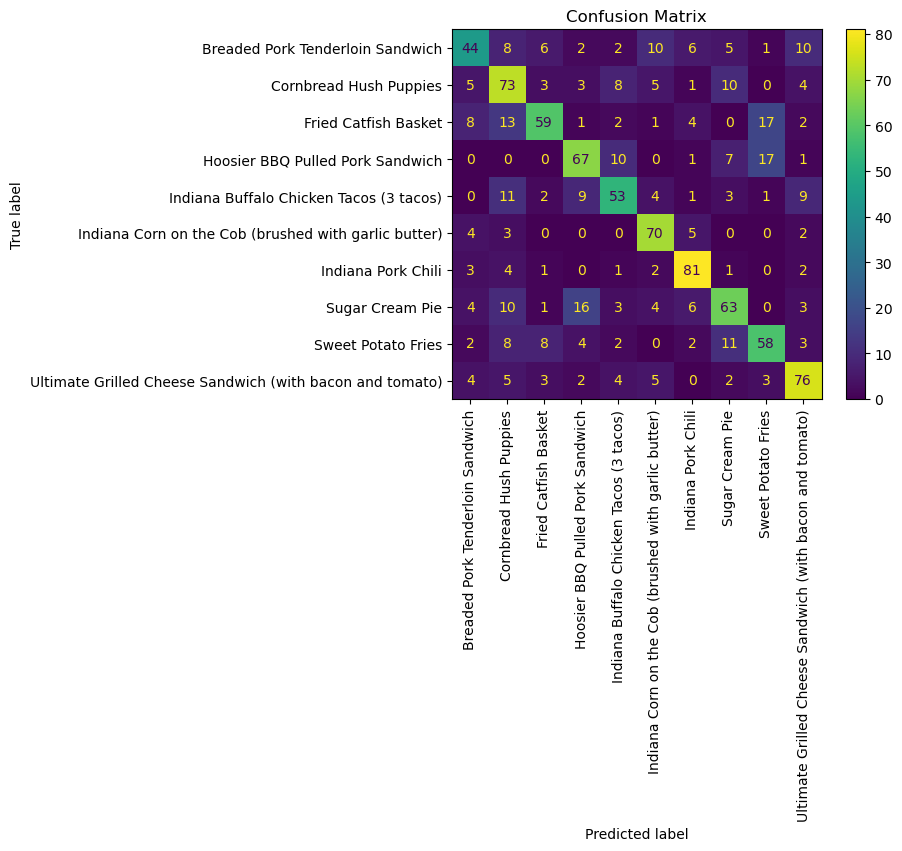

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Function to test and evaluate the model
def test_and_evaluate_model(model, X_test, y_test):
    # Predicting the orders
    y_pred = model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Order'].classes_)
    disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation=90)
    plt.title("Confusion Matrix")
    plt.show()

# Testing and evaluating the model
test_and_evaluate_model(model, X_test, y_test)

# Considerations to determine if suitable course of action

It may not be a good idea to strictly follow the prediction of order made by the model because customer orders are based on numerous factors, and the record of past orders itself may not be adequate to predict the next orders. For instance, it appears that the orders have significant relationships with the year of study, major, and university. Therefore, it would be important to make further investigation on these relationships. Furthermore, it would be beneficial to collect more data and enhance the model perforance to increase the accuracy of the prediction.